# Import Libarary

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Project4/')
!pwd

/content/drive/MyDrive/Project4


In [4]:
!pip install arabic-reshaper
!pip install python-bidi

In [5]:

import os
import re
import string
import numpy as np
import pandas as pd

import arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display

import nltk
from nltk.corpus import stopwords
from collections import  Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [6]:
data = pd.read_csv('Arabic Poetry/Arabic_poetry_dataset.csv', low_memory=False)

In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54944 entries, 0 to 54943
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54944 non-null  int64 
 1   category    54944 non-null  object
 2   poet_name   54944 non-null  object
 3   poem_title  54944 non-null  object
 4   poem_text   54944 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
df.head()

,id,category,poet_name,poem_title,poem_text
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...


In [10]:
df.shape

(54944, 5)

## 4.	Categorize the poetry entries based on genre.

## 5.	Obtain some statistics from the dataset.
    o	how many verses do we have?
    o	how many verses according to genre?
    o	How many poets do we have?
    o	How many verses per poet?
    o	for which era does the verse belong?
    o	What is the most common word?
    o	How many words within each verse?

In [11]:
#for reshape arabic text befor visualization
def add_arabic_Reshaper(text):
    return  get_display(arabic_reshaper.reshape(text))

### how many verses do we have?

In [12]:
df.shape

(54944, 5)

###  how many verses according to genre?

In [ ]:
# groupby_poem_style = df.groupby('poem_style')
# groupby_poem_style.first()

In [ ]:
# groupby_poem_style_count  = groupby_poem_style['poem_title'].count()
# groupby_poem_style_count

In [ ]:
# res1 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poem_style_count.items()}
# #res1
# df_res1= pd.DataFrame(res1.items(), columns=['poem_style', 'count'])
# df_res1

In [ ]:
# plt.figure(figsize=(8,4))

# sns.set(style="whitegrid")
# ax = sns.barplot(x="poem_style", y="count" ,data=df_res1)
# plt.savefig("images/how many verses according to genre.pdf")

In [ ]:
# plt.figure(figsize=(8,4))

# #define Seaborn color palette to use
# colors = sns.color_palette('bright')[0:5]
# #create pie chart
# plt.pie(df_res1['count'], labels = df_res1['poem_style'], colors = colors, autopct='%.0f%%')
# plt.show()

# #plt.savefig("images/how many verses according to genre.pdf")

In [ ]:
# f, ax = plt.subplots()
# sns.violinplot(data=df_res1)
# sns.despine(offset=10, trim=True);

In [ ]:
# sns.set_style("whitegrid")
# sns.boxplot(data=df_res1, palette="deep")
# sns.despine(left=True)

###  How many poets do we have?

In [13]:
len(df.poet_name.unique())

538

In [14]:
# Select unique values from the species column
print(df['poet_name'].unique().tolist())

['خلفان بن مصبح', 'سالم بن عبدالله الكراني', 'حماد بن سعيد', 'مبارك بن حمد العقيلي', 'علي بن محمد الشحي', 'محمد بن حمود الشحي', 'محمد بن صالح المنتفقي', 'يوسف بن رويسم', 'هدى السعدي', 'مانع سعيد العتيبة', 'عارف الخاجة', 'حمد بن خليفة أبو شهاب', 'كريم معتوق', 'سالم أبو جمهور القبيسي', 'قاسم حداد', 'أحلام مستغانمي', 'سهام آل براهمي', 'جلواح', 'عبد القادر الجزائري', 'سليمان بن سحمان', 'عبد الرحمن بن مساعد', 'أحمد اللهيب', 'عبدالرحمن العشماوي', 'شريف بقنه', 'ابن بشير الإحسائي', 'سامي المالكي', 'غازي القصيبي', 'محمد بن عبود العمودي', 'مدثر بن إبراهيم بن الحجاز', 'محمد عبد الباري', 'إدريس جمّاع', 'حمزة الملك طمبل', 'احمد مطر', 'نازك الملائكة', 'بدر شاكر السياب', 'محمد مهدي الجواهري', 'عبد الرزاق عبد الواحد', 'بهاء الدين الصيادي', 'معروف الرصافي', 'أبو الفيض الكتاني', 'مَحمد اسموني', 'شاعر الحمراء', 'عبدالله البردوني', 'عبد الولي الشميرى', 'ابن شهاب العلوي', 'محمد الشوكاني', 'ابن طاهر', 'ابن رشيق القيرواني', 'الشاذلي خزنه دار', 'أبو القاسم الشابي', 'سليم عبدالقادر', 'نزار قباني', 'خليل مردم ب

###  How many verses per poet?

In [ ]:
#https://www.kaggle.com/code/ozkanozturk/pandas-groupby-with-details
# https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
#https://pandas.pydata.org/docs/user_guide/visualization.html

In [15]:
groupby_poet_name = df.groupby('poet_name')

In [16]:
groupby_poet_name.first()

,id,category,poem_title,poem_text
poet_name,,,,
آمنة بنت عتيبة,14914,العصر الجاهلي,على مثل ابن مية فانعياه,عَلى مثلِ اِبن ميّة فَاِنعياه\nتشقّ نَواعمُ ال...
آمنة بنت وهب,14915,العصر الجاهلي,عفا جانب البطحاء من بن هاشم,عفا جانب البطحاء من بن هاشم\nوجاور لحدا خارجا ...
أبان الالحقي,19497,العصر العباسي,لما رأيت البز والشاره,لمّا رَأَيتُ البَزَّ وَالشارَه\nوَالفَرشَ قَد ...
أبد الصغير العلوي,13320,موريتانيا,أثار الدمع مرفض الجمان,أثار الدمع مرفضّ الجمان\nتذكر عهد دار الترجمان...
أبن أبي اليسر,28053,العصر الايوبي,لسائل الدمع عن بغداد أخبار,لسائل الدمع عن بغداد أخبار\nفما وقوفك والأحباب...
...,...,...,...,...
ولادة بنت المستكفي,44917,العصر الأندلسي,أنا واللَه أصلح للمعالي,أنا واللَه أصلح للمعالي\nوأَمشي مشيتي وأتيهُ ت...
يزيد بن الطثرية,42561,العصر الاموي,سخطت ولم أذنب وترضى مخالفا,سَخَطتَ وَلَم أُذنِب وَتَرضى مُخالِفاً\nكَأَنّ...
يزيد بن معاوية,15612,العصر الإسلامي,وساع يجمع الأموال جمعا,وَساعٍ يَجمَعُ الأَموالَ جَمعاً\nلِيورِثَها أَ...


In [17]:
# Finding the values contained in the "يزيد بن الطثرية" group
groupby_poet_name.get_group('يزيد بن الطثرية')

,id,category,poet_name,poem_title,poem_text
42387,42561,العصر الاموي,يزيد بن الطثرية,سخطت ولم أذنب وترضى مخالفا,سَخَطتَ وَلَم أُذنِب وَتَرضى مُخالِفاً\nكَأَنّ...
42388,42562,العصر الاموي,يزيد بن الطثرية,أقول لثور وهو يحلق لمتي,أَقولُ لِثَورٍ وَهوَ يَحلِقُ لُمَّتي\nبِعَقفاء...
42389,42563,العصر الاموي,يزيد بن الطثرية,يقول خليلي باللوى من حفارة,يَقولُ خَليلي بِاللَوى مِن حُفارَةٍ\nوَقَد قَف...
42390,42564,العصر الاموي,يزيد بن الطثرية,أحبك أطراف النهار بشاشة,أُحِبُّكَ أَطرافَ النَهارِ بَشاشَةً\nوَبِاللَي...
42391,42565,العصر الاموي,يزيد بن الطثرية,ألا بأبي من قد برى الجسم حبه,أَلا بِأَبي مَن قَد بَرى الجِسمَ حُبُّهُ\nوَمِ...
...,...,...,...,...,...
42447,42621,العصر الاموي,يزيد بن الطثرية,فلولا ثلاث هن من لذة الفتى,فَلولا ثلاثٌ هُنَّ من لَذَّةِ الفَتَى\nوَجَدِّ...
42448,42622,العصر الاموي,يزيد بن الطثرية,أيا حزنا وعاودني وداعي,أَيا حَزَناً وعاوَدَني وداعي\nوكانَ فراقَ لُبن...
42449,42623,العصر الاموي,يزيد بن الطثرية,إذا لم يكن بيني وبينك مرسل,إِذا لَم يَكُن بَيني وَبَينَكِ مُرسَلٌ\nفَريحُ...
42450,42624,العصر الاموي,يزيد بن الطثرية,تطاول ليلي بالعراق ولم يكن,تَطَاولَ لَيلي بالعِراقِ ولَم يَكُن\nعَلَيَّ ب...


In [18]:
groupby_poet_name_count = groupby_poet_name['poem_title'].count()
groupby_poet_name_count.head()

poet_name
آمنة بنت عتيبة       1
آمنة بنت وهب         2
أبان الالحقي         6
أبد الصغير العلوي    6
أبن أبي اليسر        1
Name: poem_title, dtype: int64

In [19]:
res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_poet_name_count.items()}
#res2
df_res2= pd.DataFrame(res2.items(), columns=['poem_title', 'count'])
df_res2.head()

,poem_title,count
0,ﺔﺒﻴﺘﻋ ﺖﻨﺑ ﺔﻨﻣﺁ,1
1,ﺐﻫﻭ ﺖﻨﺑ ﺔﻨﻣﺁ,2
2,ﻲﻘﺤﻟﻻﺍ ﻥﺎﺑﺃ,6
3,ﻱﻮﻠﻌﻟﺍ ﺮﻴﻐﺼﻟﺍ ﺪﺑﺃ,6
4,ﺮﺴﻴﻟﺍ ﻲﺑﺃ ﻦﺑﺃ,1


[Text(0.5, 0, 'count'),
 Text(0, 0.5, 'poem title'),
 Text(0.5, 1.0, 'How many words within each verse')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


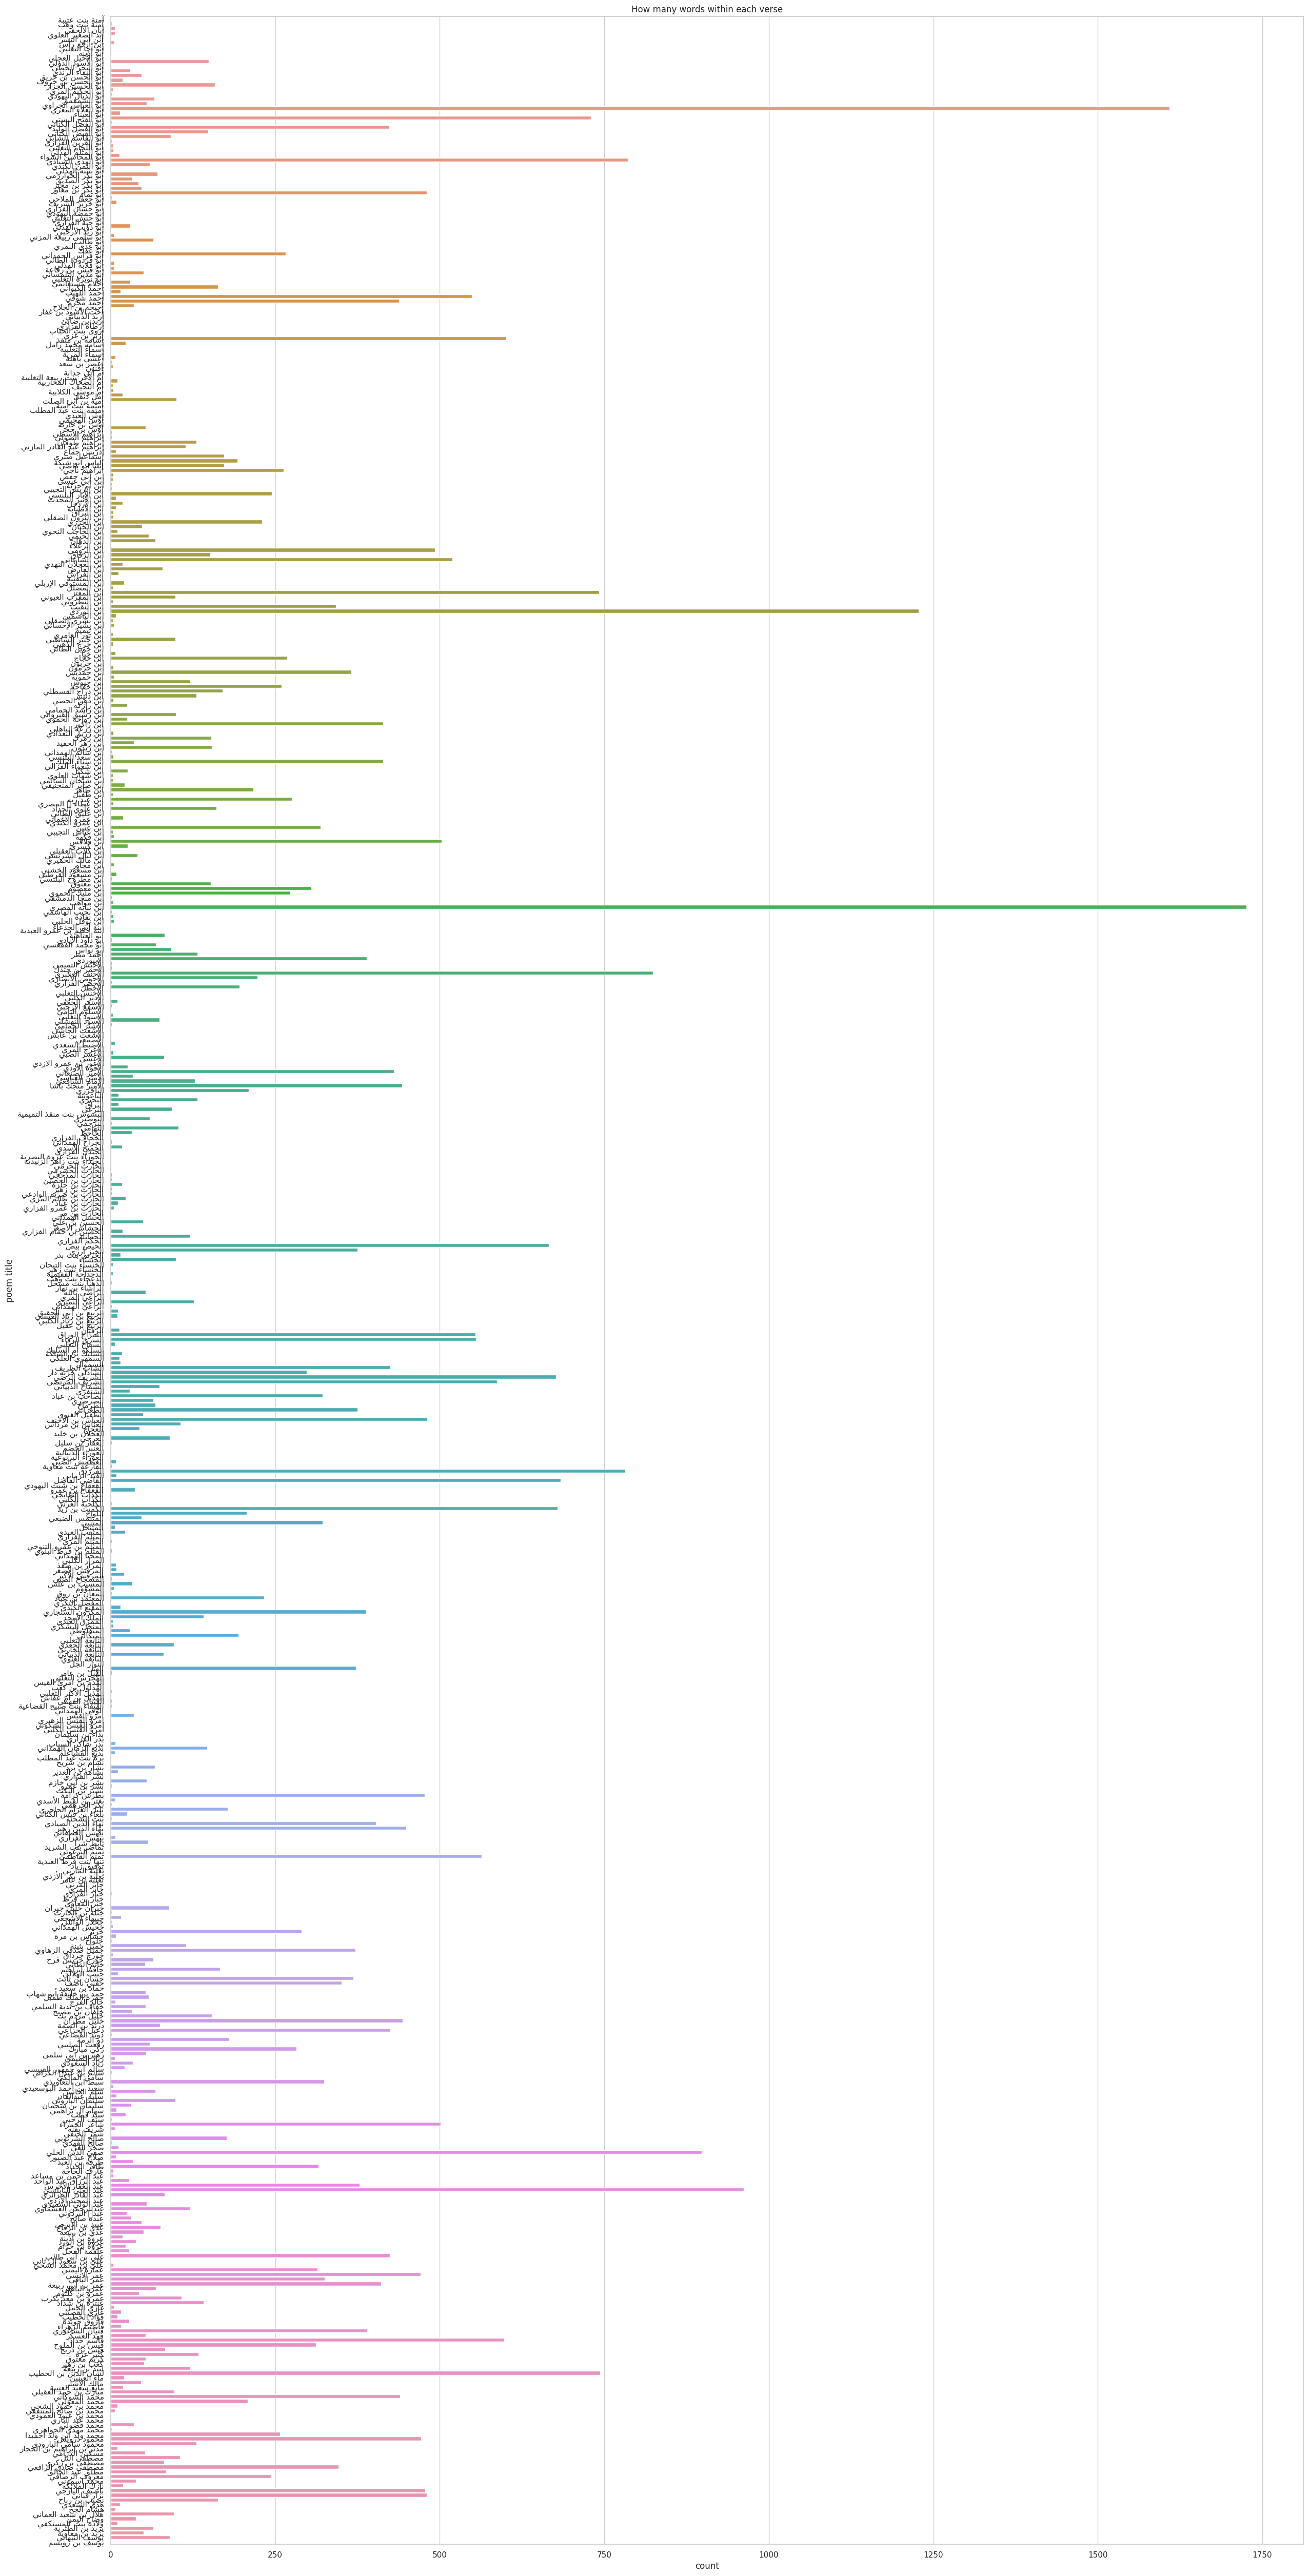

In [64]:
plt.figure(figsize=(30,64))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count", y="poem_title", data=df_res2)
ax.set(xlabel='count', ylabel='poem title', title='How many words within each verse')
#plt.savefig("images/How many verses per poet.pdf")

# Top 10 poet_name have  verses

In [21]:
df_poet_name_top = df.groupby("poet_name", sort=False).count()
df_poet_name_top

,id,category,poem_title,poem_text
poet_name,,,,
خلفان بن مصبح,32,32,32,32
سالم بن عبدالله الكراني,2,2,2,2
حماد بن سعيد,1,1,1,1
مبارك بن حمد العقيلي,96,96,96,96
علي بن محمد الشحي,4,4,4,4
...,...,...,...,...
البرعي,93,93,93,93
ابن تيمية,1,1,1,1
الطغرائي,375,375,375,375


In [22]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().reset_index()
df_poet_name_top

,poet_name,poem_title
0,آمنة بنت عتيبة,1
1,آمنة بنت وهب,2
2,أبان الالحقي,6
3,أبد الصغير العلوي,6
4,أبن أبي اليسر,1
...,...,...
533,ولادة بنت المستكفي,10
534,يزيد بن الطثرية,65
535,يزيد بن معاوية,50
536,يوسف النبهاني,90


In [23]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count().rename('count_verses').reset_index()
df_poet_name_top

,poet_name,count_verses
0,آمنة بنت عتيبة,1
1,آمنة بنت وهب,2
2,أبان الالحقي,6
3,أبد الصغير العلوي,6
4,أبن أبي اليسر,1
...,...,...
533,ولادة بنت المستكفي,10
534,يزيد بن الطثرية,65
535,يزيد بن معاوية,50
536,يوسف النبهاني,90


In [24]:
df_poet_name_top = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=False). \
head(10)
df_poet_name_top

,poet_name,count_verses
189,ابن نباته المصري,1726
19,أبو العلاء المعري,1609
126,ابن الوردي,1228
462,عبد الغني النابلسي,962
454,صفي الدين الحلي,898
203,الأحنف العكبري,824
30,أبو الهدى الصيادي,786
309,الفرزدق,782
501,لسان الدين بن الخطيب,744
122,ابن المعتز,742


In [25]:
type(df_poet_name_top)

pandas.core.frame.DataFrame

In [26]:
df_poet_name_top["poet_name_reshape"]  = df_poet_name_top.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'poet name'),
 Text(0.5, 1.0, 'Top 10 poet name have verses')]

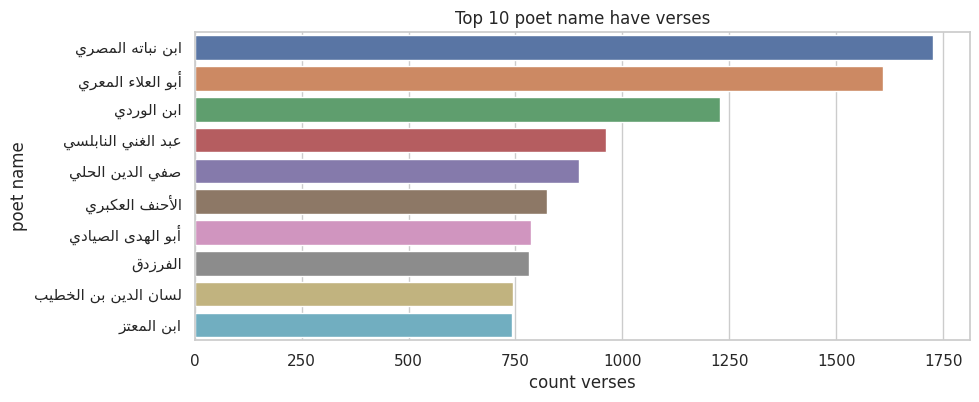

In [27]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_top)

ax.set(xlabel='count verses', ylabel='poet name', title='Top 10 poet name have verses')

# Low 10 poet_name have  verses

In [28]:
df_poet_name_low = df.groupby("poet_name", sort=True)['poem_title'].count() \
                                                    .rename('count_verses') \
                                                    .reset_index() \
                                                    .sort_values(['count_verses'], ascending=True) \
                                                    .head(10)
df_poet_name_low

,poet_name,count_verses
0,آمنة بنت عتيبة,1
241,الجندل الفزاري,1
242,الجوزاء بنت عروة البصرية,1
243,الجيداء بنت زاهر الزبيدية,1
244,الحارث الجرمي,1
245,الحارث الحضرمي,1
254,الحارث بن مر,1
255,الحسل الهمداني,1
257,الحشاش الأصغر,1
238,الجحاف الفزاري,1


In [29]:
df_poet_name_low["poet_name_reshape"]  = df_poet_name_low.poet_name.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count verses'),
 Text(0, 0.5, 'poet name'),
 Text(0.5, 1.0, 'Low 10 poet name have verses')]

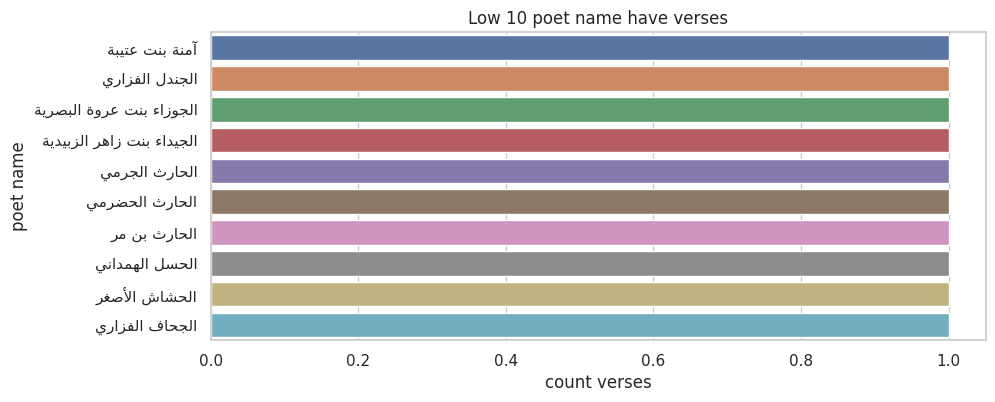

In [30]:
plt.figure(figsize=(10,4))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_verses", y="poet_name_reshape", data=df_poet_name_low)
ax.set(xlabel='count verses', ylabel='poet name', title='Low 10 poet name have verses')

###  for which era does the verse belong?

In [31]:
# Select unique values from the species column
df['category'].unique()

array(['الإمارات', 'البحرين', 'الجزائر', 'السعودية', 'السودان', 'العراق',
       'المغرب', 'اليمن', 'تونس', 'سوريا', 'عمان', 'فلسطين', 'لبنان',
       'ليبيا', 'مصر', 'الأردن', 'الكويت', 'قطر', 'موريتانيا',
       'العصر الجاهلي', 'العصر الإسلامي', 'العصر العباسي',
       'العصر الايوبي', 'العصر العثماني', 'عصر المخضرمون', 'العصر الاموي',
       'العصر الأندلسي', 'العصر المملوكي'], dtype=object)

In [32]:
groupby_era = df.groupby('category')

In [33]:
groupby_era.first()

,id,poet_name,poem_title,poem_text
category,,,,
الأردن,13036,رفعت الصليبي,بلبل في الرياض يلهمه الوحي,بلبلٌ في الرياض يُلهِمُه الوحيُ \nفيشجي القلوب...
الإمارات,0,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...
البحرين,315,قاسم حداد,العاشق,أنا ولدٌ تاهَ\nوأغواني هوايَ\nولا أجدُّ في نية...
الجزائر,1020,أحلام مستغانمي,شفتان على شفا قبله,"""هل عشت القبلة والقصيدة\nفالموت إذن\nلن يأخذ م..."
السعودية,1143,سليمان بن سحمان,بحمد الله نبدأ في المقال,بحمد الله نبدأ في المقال\nوذكر الله في كل الفع...
السودان,1343,مدثر بن إبراهيم بن الحجاز,إذا أنت ترحمني أنا ذلك العبد,إذا أنت ترحمني أنا ذلك العبد\nكثير الخطا يا سي...
العراق,1420,احمد مطر,هذه الأرض لنا,قُوتُ عِيالِنا هُنا\nيُهدِرُهُ جلالةُ الحِمارْ...
العصر الأندلسي,42822,ابن حيوس,طيف ألم قبيل منصدع الضيا,طَيفٌ ألمَّ قُبَيْل منصدعِ الضيا\nليثير من وجد...
العصر الإسلامي,15461,السمهري العلكي,أعني على برق أريك وميضه,أَعِنّي عَلى بَرقٍ أُريكَ وَميضَهُ\nيَشوقُ إِذ...


In [34]:
groupby_era.get_group('العصر الجاهلي')

,id,category,poet_name,poem_title,poem_text
13409,13583,العصر الجاهلي,ابن شعواء الفزالي,رعى طرفها الواشون حتى تبينوا,رَعى طَرفَها الواشونَ حَتى تَبَيَّنوا\nهَواها ...
13410,13584,العصر الجاهلي,ابن عليق الطائي,خليلي عوجا فانظراني لعلني,خَليليَّ عَوجا فاِنظُراني لَعلَّني\nأُسائِلُ ر...
13411,13585,العصر الجاهلي,امرؤ القيس,لمن طلل بين الجدية والجبل,لِمَن طَلَلٌ بَينَ الجُدَيَّةِ والجبَل\nمَحَلٌ...
13412,13586,العصر الجاهلي,امرؤ القيس,جزعت ولم أجزع من البين مجزع,جَزَعتُ وَلَم أَجزَع مِنَ البَينِ مَجزَع\nوَعَ...
13413,13587,العصر الجاهلي,امرؤ القيس,حي الحمول بجانب العزل,حَيِّ الحُمولَ بِجانِبِ العَزلِ\nإِذ لا يُلائِ...
...,...,...,...,...,...
15282,15456,العصر الجاهلي,عبيد بن الأبرص,أبلغ جذاما ولخما إن عرضت بهم,أَبلِغ جُذاماً وَلَخماً إِن عَرَضتَ بِهِم\nوَا...
15283,15457,العصر الجاهلي,عبيد بن الأبرص,وقد باتت عليه مها رماح,وَقَد باتَت عَلَيهِ مَها رُماحٍ\nحَواسِرَ ما ت...
15284,15458,العصر الجاهلي,عبيد بن الأبرص,يا ذا المخوفنا بقت,يا ذا المُخَوِّفَنا بِقَت\nلِ أَبيهِ إِذلالاً ...
15285,15459,العصر الجاهلي,عبيد بن الأبرص,تغيرت الديار بذي الدفين,تَغَيَّرَتِ الدِيارُ بِذي الدَفينِ\nفَأَودِيَة...


In [35]:
groupby_era_count  = groupby_era['poem_title'].count()
#roupby_era_count

In [36]:
res3 = {get_display(arabic_reshaper.reshape(k)): v for k,v in groupby_era_count.items()}
#res3
df_res3= pd.DataFrame(res3.items(), columns=['category', 'count_poem_title'])
df_res3

,category,count_poem_title
0,ﻥﺩﺭﻷﺍ,203
1,ﺕﺍﺭﺎﻣﻹﺍ,315
2,ﻦﻳﺮﺤﺒﻟﺍ,598
3,ﺮﺋﺍﺰﺠﻟﺍ,123
4,ﺔﻳﺩﻮﻌﺴﻟﺍ,200
5,ﻥﺍﺩﻮﺴﻟﺍ,77
6,ﻕﺍﺮﻌﻟﺍ,834
7,ﻲﺴﻟﺪﻧﻷﺍ ﺮﺼﻌﻟﺍ,3238
8,ﻲﻣﻼﺳﻹﺍ ﺮﺼﻌﻟﺍ,212
9,ﻱﻮﻣﻻﺍ ﺮﺼﻌﻟﺍ,4314


[Text(0.5, 0, 'count poem title'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'for which era does the verse belong')]

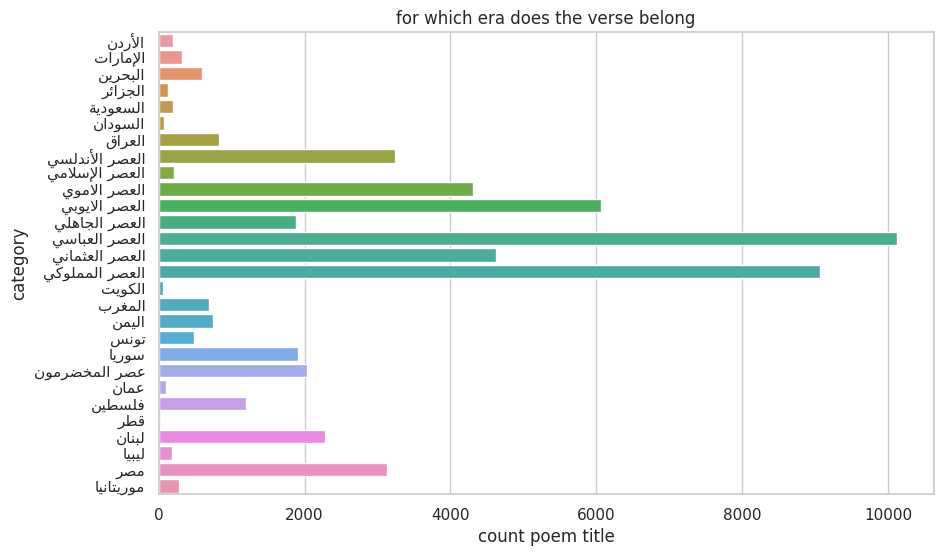

In [37]:
plt.figure(figsize=(10,6))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x="count_poem_title", y="category", data=df_res3)
ax.set(xlabel='count poem title', ylabel='category', title='for which era does the verse belong')

#plt.savefig("images/for which era does the verse belong.pdf")

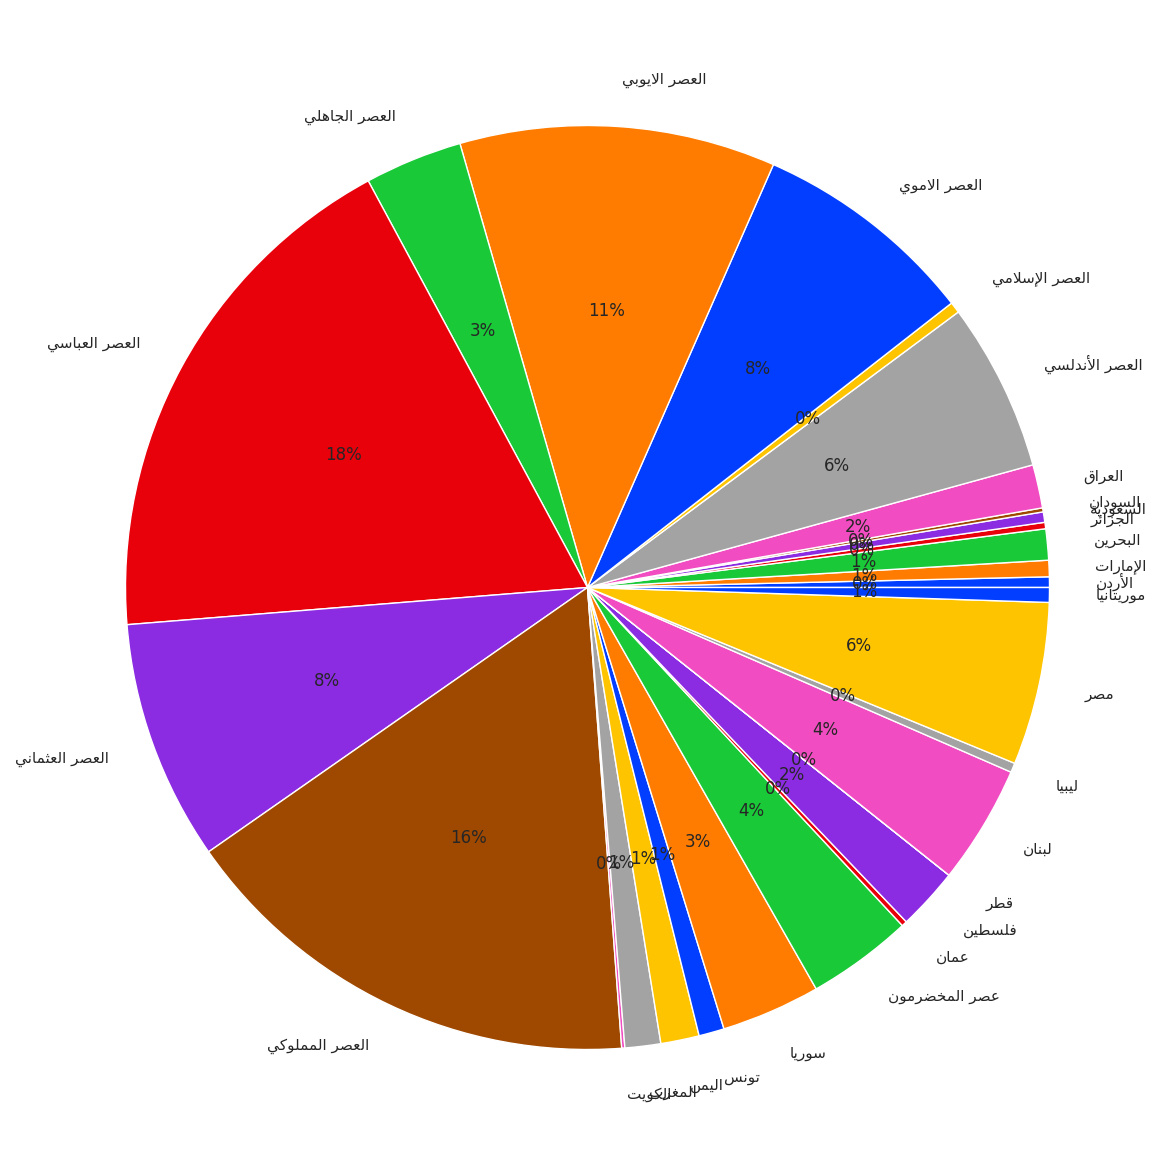

In [46]:
#لتغير الرسم يتم التغير بالارقام
plt.figure(figsize=(35,15))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_res3['count_poem_title'], labels = df_res3['category'], colors = colors, autopct='%.0f%%')
plt.show()

# short method

In [47]:
df_category = df.groupby("category", sort=True)['poem_title'].count().rename('count_poem_title').reset_index()
df_category

,category,count_poem_title
0,الأردن,203
1,الإمارات,315
2,البحرين,598
3,الجزائر,123
4,السعودية,200
5,السودان,77
6,العراق,834
7,العصر الأندلسي,3238
8,العصر الإسلامي,212
9,العصر الاموي,4314


In [48]:
df_category["category_reshape"]  = df_category.category.apply(lambda x: add_arabic_Reshaper(x))

[Text(0.5, 0, 'count poem title'),
 Text(0, 0.5, 'category'),
 Text(0.5, 1.0, 'for which era does the verse belong')]

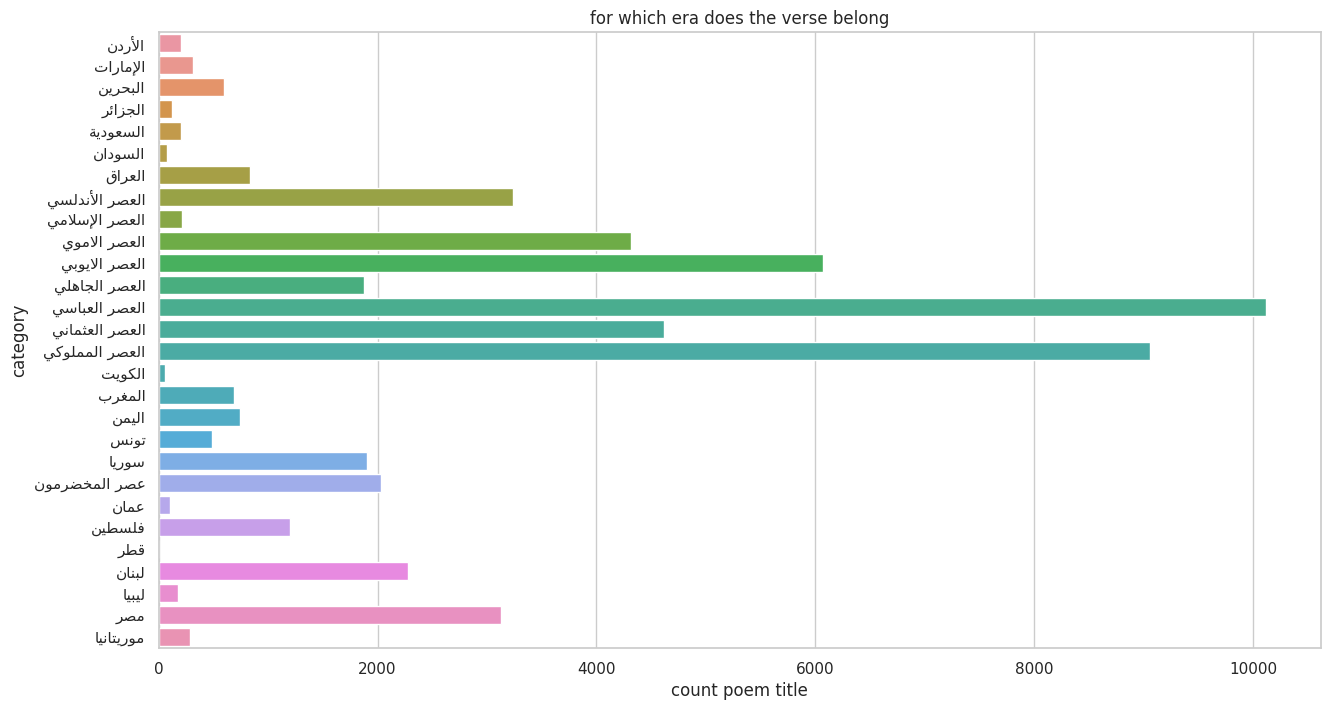

In [49]:
plt.figure(figsize=(15,8))

ax = sns.set(style="whitegrid")
ax = sns.barplot(x=df_category.count_poem_title, y= df_category.category_reshape )
ax.set(xlabel='count poem title', ylabel='category', title='for which era does the verse belong')

#plt.savefig("images/for which era does the verse belong.pdf")

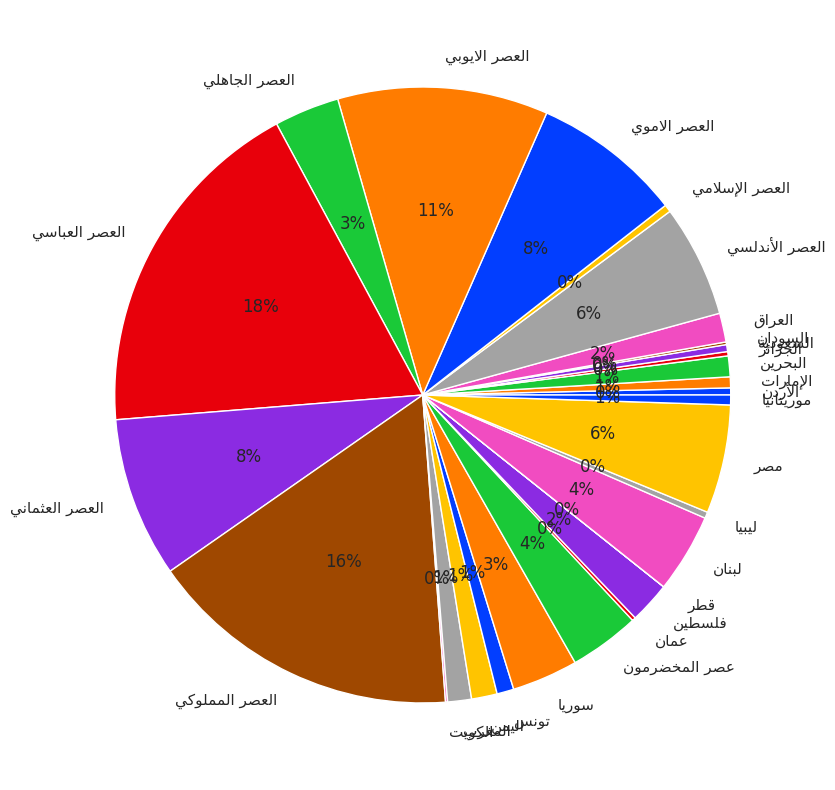

In [47]:
#لتغير الرسم يتم التغير بالارقام
plt.figure(figsize=(24,10))

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_category.count_poem_title, labels = df_category.category_reshape, colors = colors, autopct='%.0f%%')
plt.show()

###   What is the most common word?

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
# Code Snippet for Top Non-Stopwords Barchart
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('arabic'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter=Counter(corpus)
    most=counter.most_common()
    word_list, count_list=[], []
    for word,count in most[:40]:
        if (word not in stop):
            word_list.append(get_display(arabic_reshaper.reshape(word)))
            count_list.append(count)

    return word_list,count_list

word_list,count_list =  plot_top_non_stopwords_barchart(df['poem_text'])
#word_list,count_list

In [52]:
len (word_list) , len (count_list)

(15, 15)

In [53]:
data = {
    'word_list':word_list,
    'count_list':count_list
}
df_most_common_word= pd.DataFrame(data)
df_most_common_word.head(10)

,word_list,count_list
0,ﻦﻣ,41896
1,ﻰﻠﻋ,20338
2,ﺍﺫﺇ,18084
3,ﻻﻭ,13805
4,ﻦﻣ,13402
5,ﻢﻟ,11469
6,ﻰﻟﺇ,11422
7,ﻦﻣ,11008
8,ﺪﻗ,10596
9,ﻪﺑ,10391


[Text(0.5, 0, 'word'),
 Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'most common word')]

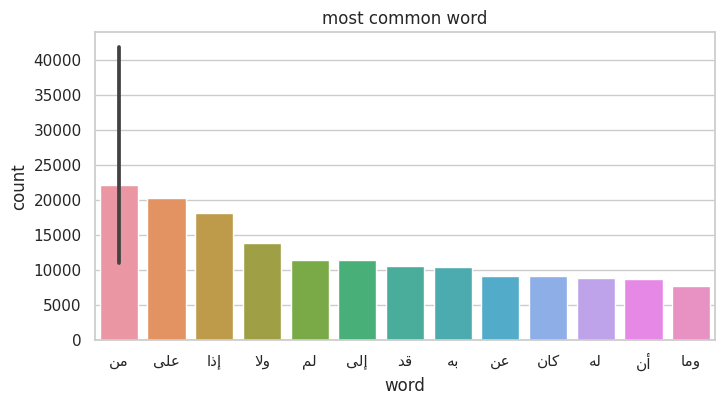

In [54]:
plt.figure(figsize=(8,4))
ax = sns.set(style="whitegrid")
ax = sns.barplot(x=df_most_common_word.word_list,y=df_most_common_word.count_list)
ax.set(xlabel='word', ylabel='count', title='most common word')
#plt.savefig("images/top_non_stopwords.pdf")


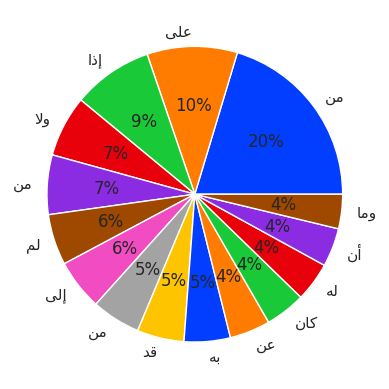

In [55]:
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:9]

#create pie chart
plt.pie(df_most_common_word.count_list, labels = df_most_common_word.word_list, colors = colors, autopct='%.0f%%')
plt.show()

### How many words within each verse?

In [56]:
df['word_count'] = df.poem_text.str.split().str.len()

In [57]:
df.head()

,id,category,poet_name,poem_title,poem_text,word_count
0,0,الإمارات,خلفان بن مصبح,بدت تختال في حُلل الجمالِ,بدت تختال في حُلل الجمالِ\nوجادت بالزيارة والو...,297
1,1,الإمارات,خلفان بن مصبح,يا طائر الشعر القرير,يا طائر الشعر القرير\nيا وحي إلهام الصدور\nأسع...,360
2,2,الإمارات,خلفان بن مصبح,بنت حجرات أرى من عجب,بنت حجرات أرى من عجب\nأن أرى فيك جمال العرب\nد...,37
3,3,الإمارات,خلفان بن مصبح,هذا الربيع بنور الحسن وافانا,هذا الربيع بنور الحسن وافانا\nوقد كسا الأرض با...,457
4,4,الإمارات,خلفان بن مصبح,روحي فداك وإن مُنحتُ صدوداً,روحي فداك وإن مُنحتُ صدوداً\nأخفاك ما بي أم أط...,27


In [58]:
df_word_count = df[df.word_count > 4444].head(10)
df_word_count

,id,category,poet_name,poem_title,poem_text,word_count
2273,2380,المغرب,أبو الفيض الكتاني,ببسم إله العرش أهتف داخلا,ببسم إله العرش أهتف داخلا\nمنيع حماه لابساً در...,8100
6462,6635,فلسطين,محمود درويش,جدارية محمود درويش,هذا هُوَ اُسمُكَ /\nقالتِ اُمرأةٌ ،\nوغابتْ في...,5536
6508,6681,فلسطين,محمود درويش,مديح الظل العالي,بحرٌ لأيلولَ الجديدِ. خريفُنا يدنو من الأبوابِ...,4611
7098,7271,فلسطين,يوسف النبهاني,نورك الكل والورى أجزاء,نورُكَ الكُلُّ وَالوَرى أَجزاءُ\nيا نَبِيّاً م...,9258
7178,7351,فلسطين,يوسف النبهاني,بربك ذكرهم عسى تنفع الذكرى,بربّك ذَكّرهم عَسى تنفعُ الذِكرى\nفَكَم نِعم أ...,7903
7179,7352,فلسطين,يوسف النبهاني,هو الله لا نحصي لآلائه شكرا,هوَ اللَّه لا نُحصي لآلائهِ شكرا\nلهُ الحمدُ ف...,5951
10575,10749,مصر,محمود سامى البارودى,يا رائد البرق يمم دارة العلم,يا رَائِدَ البَرقِ يَمّمِ دارَةَ العَلَمِ\nوَا...,4816
11278,11452,مصر,أحمد محرم,ردوا غمراتها في الواردينا,ردوا غمراتِها في الواردينا\nوسيروا في الممالكِ...,4805
28054,28228,العصر الايوبي,ابن الفارض,سقتني حميا الحب راحة مقلتي,سَقَتني حُمَيَّا الحُبَّ راحَةَ مُقلَتي\nوَكَأ...,7986
52688,52862,العصر المملوكي,الصرصري,سبحان ذي الجبروت والبرهان,سُبحانَ ذي الجَبروتِ وَالبُرهانِ\nوَالعِزِّ وَ...,7727


In [59]:
df_word_count.shape

(10, 6)

In [60]:
# clean and normalize text
df_word_count["poem_title_reshaper"]  = df_word_count.poem_title.apply(lambda x: add_arabic_Reshaper(x))

In [61]:
df_word_count.head()

,id,category,poet_name,poem_title,poem_text,word_count,poem_title_reshaper
2273,2380,المغرب,أبو الفيض الكتاني,ببسم إله العرش أهتف داخلا,ببسم إله العرش أهتف داخلا\nمنيع حماه لابساً در...,8100,ﻼﺧﺍﺩ ﻒﺘﻫﺃ ﺵﺮﻌﻟﺍ ﻪﻟﺇ ﻢﺴﺒﺑ
6462,6635,فلسطين,محمود درويش,جدارية محمود درويش,هذا هُوَ اُسمُكَ /\nقالتِ اُمرأةٌ ،\nوغابتْ في...,5536,ﺶﻳﻭﺭﺩ ﺩﻮﻤﺤﻣ ﺔﻳﺭﺍﺪﺟ
6508,6681,فلسطين,محمود درويش,مديح الظل العالي,بحرٌ لأيلولَ الجديدِ. خريفُنا يدنو من الأبوابِ...,4611,ﻲﻟﺎﻌﻟﺍ ﻞﻈﻟﺍ ﺢﻳﺪﻣ
7098,7271,فلسطين,يوسف النبهاني,نورك الكل والورى أجزاء,نورُكَ الكُلُّ وَالوَرى أَجزاءُ\nيا نَبِيّاً م...,9258,ﺀﺍﺰﺟﺃ ﻯﺭﻮﻟﺍﻭ ﻞﻜﻟﺍ ﻙﺭﻮﻧ
7178,7351,فلسطين,يوسف النبهاني,بربك ذكرهم عسى تنفع الذكرى,بربّك ذَكّرهم عَسى تنفعُ الذِكرى\nفَكَم نِعم أ...,7903,ﻯﺮﻛﺬﻟﺍ ﻊﻔﻨﺗ ﻰﺴﻋ ﻢﻫﺮﻛﺫ ﻚﺑﺮﺑ


[Text(0.5, 0, 'word count'),
 Text(0, 0.5, 'poem title'),
 Text(0.5, 1.0, 'Low 10 poet name have verses')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


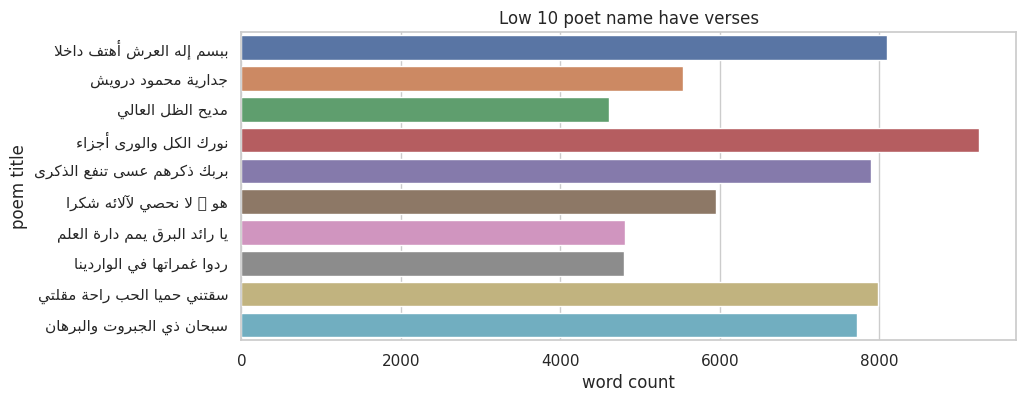

In [62]:
plt.figure(figsize=(10,4))
ax = sns.set(style="whitegrid")
ax = sns.barplot(x="word_count", y="poem_title_reshaper", data=df_word_count)
ax.set(xlabel='word count', ylabel='poem title', title='Low 10 poet name have verses')

#plt.savefig("images/How many words within each verse.pdf")

# Generating Word Cloud

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('arabic'))
print( len (stopwords))
#print (stopwords)

701


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
#stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df.poem_text[:20]:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = get_display(arabic_reshaper.reshape(tokens[i].lower()))

    comment_words += " ".join(tokens)+" "


In [64]:
comment_words

'ﺕﺪﺑ ﻝﺎﺘﺨﺗ ﻲﻓ ﻞﻠﺣ ﻝﺎﻤﺠﻟﺍ ﺕﺩﺎﺟﻭ ﺓﺭﺎﻳﺰﻟﺎﺑ ﻝﺎﺻﻮﻟﺍﻭ ﺲﻴﻤﺗ ﻼﻓ ﺎﻬﻟﺩﺎﻌﻳ ﺐﻴﻀﻗ ﻥﺇﻭ ﻮﻧﺮﺗ ﺐﻋﺍﺪﺗ ﻝﺎﺼﻨﻟﺎﺑ ﺎﻬﻤﺴﺒﻤﺑ ﺮﻤﻌﻟ ﻚﻴﺑﺃ ﺭﺩ ﻲﻓﻭ ﺎﻬﻗﺎﻤﻋﺃ ﻊﺒﻧ ﻝﻻﺰﻟﺍ ﺮﺼﺧﻭ ﻚﻴﺒﺘﺴﻳ ﺍﺫﺇ ﺖﻟﻮﺗ ﻦﺼﻐﻛ ﻥﺎﺒﻟﺍ ﻲﻓ ﺐﺜﻛ ﻝﺎﻣﺮﻟﺍ ﺕﺪﺒﺗ ﺐﻴﻀﻘﻟﺎﻛ ﻰﻠﻋ ﺐﻴﺜﻛ ﺖﻠﺟﻭ ﺓﺮﻴﻨﻤﻟﺎﻛ ﻲﻓ ﻲﻟﺎﻴﻠﻟﺍ ﺖﻤﻘﻓ ﺐﻋﺍﺩﺃ ﺕﺎﻨﺟﻮﻟﺍ ﺎﻬﻨﻣ ﻢﺜﻟﺃﻭ ﺎﻫﺮﻐﺛ ﻲﻜﺣ ﻲﻟﻶﻟﺍ ﺮﺼﻫﺃﻭ ﺎﻬﻨﺼﻏ ﺎﻤﺿ ﺎﻤﻟﻭ ﻮﻬﻟﺃﻭ ﻦﻴﻤﻴﻟﺎﺑ ﻝﺎﻤﺸﻟﺎﺑﻭ ﻦﻣﻭ ﻖﻠﺧ ﻑﺎﻔﻌﻟﺍ ﺎﻨﻟ ﺐﻴﻗﺭ ﺮﻬﻄﺑ ﺐﺤﻟﺍ ﻲﻓ ﻦﺴﺣ ﻝﻼﺨﻟﺍ ﺪﻗﻭ ﺏﺎﻏ ﺐﻴﻗﺮﻟﺍ ﺏﺎﻃﻭ ﻲﺴﻧﺃ ﺮﻴﻃﻭ ﺐﺤﻟﺍ ﺡﺪﺼﻳ ﻝﺎﺜﺘﻣﺎﺑ ﻝﻮﻘﺗ ﻙﺍﺭﺃ ﺮﻬﻈﺗ ﻲﻟ ﺎﻗﺎﻴﺘﺷﺍ ﻞﻌﻔﺗﻭ ﻉﺩﻮﻤﻟﺎﻛ ﻝﺎﺣﺮﻠﻟ ﺖﻠﻘﻓ ﺎﻬﻟ ﻙﺪﻳﻭﺭ ﻥﺇ ﻲﺒﻠﻗ ﻲﺒﺣﻭ ﻢﻟ ﻦﻜﻳ ﺎﻣﻮﻳ ﻲﻟﺎﺴﺑ ﻲﻨﻜﻟﻭ ﺖﻣﺰﻋ ﻲﻓﻭ ﻡﺰﻋ ﺃﺰﻬﻴﻟ ﺔﻨﺳﻷﺎﺑ ﻲﻟﺍﻮﻌﻟﺍﻭ ﺖﻤﺌﺳ ﻦﻣ ﻡﺎﻘﻤﻟﺍ ﻞﻛﻭ ﺀﻲﺷ ﺍﺫﺇ ﺎﻣ ﻡﺍﺩ ﻡﺄﺴﻳ ﻻ ﻝﺎﺤﻣ ﺏﺮﺿﺄﺳ ﻲﻓ ﺓﺎﻴﺤﻟﺍ ﻢﻬﺴﺑ ﻱﺪﺟ ﻰﻈﺤﻧﻭ ﺓﺮﺴﻤﻟﺎﺑ ﻝﺎﺻﻮﻟﺍﻭ ﻊﺟﺭﺃﻭ ﻥﺇ ﺎﺸﻳ ﻱﺭﺎﺒﻟﺍ ﺎﺒﻳﺮﻗ ﻚﻴﻟﺇ ﻲﻨﺘﺒﻨﻟ ﺡﺮﺻ ﻲﻟﺎﻌﻤﻟﺍ ﻕﺮﻗﺮﻓ ﺆﻟﺆﻟ ﻲﻓ ﺎﻬﻴﺘﻠﻘﻣ ﺖﺣﺎﺻﻭ ﻩﺁ ﻦﻣ ﺮﻣ ﻲﻟﺎﻴﻠﻟﺍ ﻙﺮﺘﺗﺃ ﺎﻳ ﺐﻴﺒﺣ ﺡﻭﺮﻟﺍ ﺎﺒﻠﻗ ﺩﺎﻜﻳ ﺏﻭﺬﻳ ﻦﻣ ﻕﻮﺷ ﻲﻟﺎﺤﻟ ﻲﻧﻮﻠﺴﺗﻭ ﺖﻧﺃﻭ ﻢﻴﻌﻧ ﻲﺣﻭﺭ ﻻﻭ ﻰﻋﺮﺗ ﺓﺩﻮﻤﻟﺍ ﻭﺃ ﻲﻟﺎﺒﺗ ﻆﻔﺤﻴﻟ ﻪﻟﻹﺍ ﻞﻜﺑ ﺽﺭﺃ ﻚﻗﺯﺮﻳﻭ ﺔﻣﻼﺴﻟﺍ ﻲﻓ ﻝﺎﻤﻜﻟﺍ ﺎﻨﻤﺟﻭ ﻢﻟ ﺮﺤﻧ ﻻﻮﻗ ﻦﻜﻟﻭ ﺮﻴﻬﻧ ﻊﻣﺪﻟﺍ ﺽﺎﻓ ﻰﻠﻋ ﻲﻟﺍﻮﺘﻟﺍ ﺡﻻﻭ ﺢﺒﺼﻟﺍ ﻦﻣ ﺖﺤﺗ ﺎﻳﺮﺜﻟﺍ ﺎﻤﻛ ﺡﻻ ﺐﻴﺸﻤﻟﺍ ﻦﻴﻌﺑ ﻝﺎﻗ ﻪﻠﻟﺎﻴﻓ ﻢﻛ ﺖﺑﺍﺫ ﺏﻮﻠﻗ ﻢﻛﻭ ﺖﻟﺎﺳ ﻉﻮ

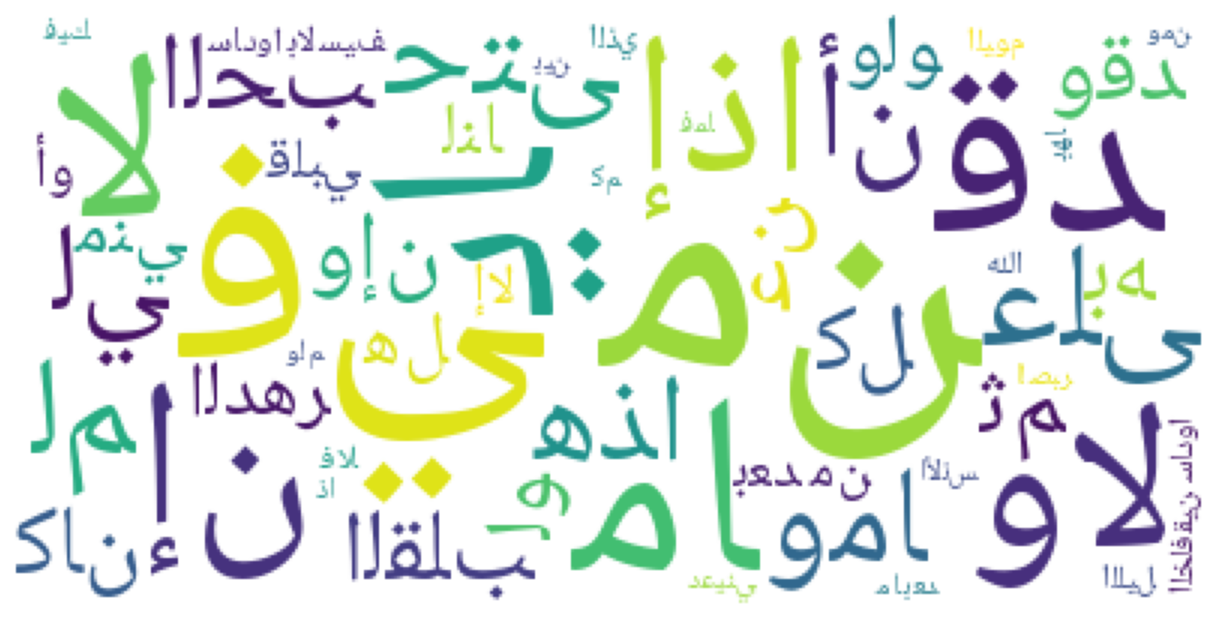

In [65]:
# Make text readable for a non-Arabic library like wordcloud
text = get_display(arabic_reshaper.reshape(comment_words))
text = get_display(text)

# Generate a word cloud image
wordcloud = WordCloud(font_path='fonts/NotoNaskhArabic-Regular.ttf',
                        background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(text)

# Export to an image
wordcloud.to_file("arabic_example.png")

# plot the WordCloud image
plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
